In [1]:
# Enable interactive plot
%matplotlib notebook

In [2]:
from classes import Space

import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation
import matplotlib.animation as animation

### Содание класса пространства мира (клетки)

### Создание класса мира

### Запуск эксперимента жизни

#### ArtistAnimation

<IPython.core.display.Javascript object>


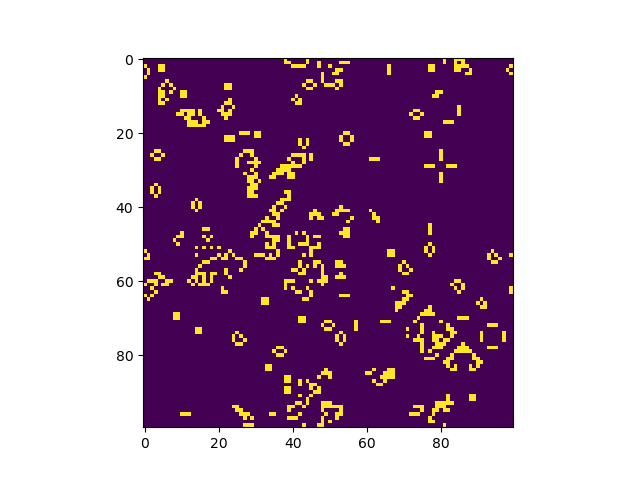

In [4]:
space = Space([100,100], False)
space.random_first_generation([5,1])

fig = plt.figure()
ax = fig.add_subplot()

frames = []
img = ax.imshow(space.cells_life_status())
frames.append([img])
for _ in range (100):
    space.recalculation_neighbours()
    space.new_epoch()

    img = ax.imshow(space.cells_life_status())
    frames.append([img])

animation = ArtistAnimation(
    fig,
    frames,
    interval=100,
    blit=True,
    repeat=True)

animation.save('game_of_life.gif', writer='imagemagick', fps=6)

plt.show()